In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/Defect_GNN/Bond_length_un_op.csv'
df = pd.read_csv(file_path, header=None)

df.columns = ['Defect', 'difference_in_avg_distance_from_defect']



def refine_categorize_defect(defect_name):
    if "_M_i_" in defect_name:
        return "Interstitial"
    elif "_V_" in defect_name:
        return "Vacancy"
    elif "_M_" in defect_name:
        return "Antisite"
    else:
        return "Other"


df['Category'] = df['Defect'].apply(refine_categorize_defect)


df_vacancy = df[df['Category'] == 'Vacancy']
df_interstitial = df[df['Category'] == 'Interstitial']
df_antisite = df[df['Category'] == 'Antisite']


print(df_vacancy.head())
print("Length of df_vacancy:", len(df_vacancy))
print(df_interstitial.head())
print("Length of df_interstitial:", len(df_interstitial))
print(df_antisite.head())
print("Length of df_antisite:", len(df_antisite))


                    Defect  difference_in_avg_distance_from_defect Category
0   AlAs_III_V_M_A_Ta.vasp                                0.007465  Vacancy
1   AlAs_III_V_M_A_Ti.vasp                                0.004855  Vacancy
2    AlAs_III_V_M_B_O.vasp                                0.050661  Vacancy
3   AlAs_III_V_M_B_Tl.vasp                                0.024209  Vacancy
10   AlN_III_V_M_A_La.vasp                                0.051054  Vacancy
Length of df_vacancy: 70
                        Defect  difference_in_avg_distance_from_defect  \
4     AlAs_III_V_M_i_A_Cl.vasp                                0.024571   
5     AlAs_III_V_M_i_A_Te.vasp                                0.053977   
6      AlAs_III_V_M_i_B_C.vasp                                0.006763   
7     AlAs_III_V_M_i_B_In.vasp                                0.051023   
8  AlAs_III_V_M_i_neut_Ru.vasp                                0.024231   

       Category  
4  Interstitial  
5  Interstitial  
6  Interstitial  
7 

In [4]:
mean_vacancy = df_vacancy['difference_in_avg_distance_from_defect'].mean()
mean_interstitial = df_interstitial['difference_in_avg_distance_from_defect'].mean()
mean_antisite = df_antisite['difference_in_avg_distance_from_defect'].mean()

(mean_vacancy, mean_interstitial, mean_antisite)


(0.025614677912477717, 0.07651977611113353, 0.025220109480430113)

In [5]:
# List the top 3 interstitial defects with the maximum formation energy
top_interstitial_defects = df_interstitial.nlargest(3, 'difference_in_avg_distance_from_defect')
top_interstitial_defects.reset_index(drop=True, inplace=True)
top_interstitial_defects

,Defect,difference_in_avg_distance_from_defect,Category
0,C_IV_IV_M_i_A_Hg.vasp,0.359673,Interstitial
1,CdS_II_VI_M_i_A_Re.vasp,0.267777,Interstitial
2,CdS_II_VI_M_i_A_O.vasp,0.263987,Interstitial


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/opt_un_A_rich.csv'
df = pd.read_csv(file_path, header=None, names=['AB', 'defect', 'deltaH_Arich', 'deltaH_ArichUO'])



def refine_categorize_defect(defect_name):
    if "_i_" in defect_name:
        return "Interstitial"
    elif "V_" in defect_name:
        return "Vacancy"
    elif "_" in defect_name:
        return "Antisite"
    else:
        return "Other"

# Apply the categorization function to the 'Defect' column
df['Category'] = df['defect'].apply(refine_categorize_defect)


df_vacancy = df[df['Category'] == 'Vacancy']
df_interstitial = df[df['Category'] == 'Interstitial']
df_antisite = df[df['Category'] == 'Antisite']

print(df_vacancy.head())
print(df_interstitial.head())
print(df_antisite.head())

      AB defect deltaH_Arich deltaH_ArichUO Category
1    ZnO   V_Zn  6.265572845    6.738262845  Vacancy
2    ZnO    V_O  0.965926747    1.202208747  Vacancy
11   ZnS   V_Zn  4.551929915    4.604936115  Vacancy
12   ZnS    V_S  1.649560047    1.942523047  Vacancy
21  ZnSe   V_Zn  3.685657035    3.784746135  Vacancy
    AB     defect deltaH_Arich deltaH_ArichUO      Category
5  ZnO     Zn_i_A  3.611931205    7.560931205  Interstitial
6  ZnO     Zn_i_B  2.894235345    4.876615345  Interstitial
7  ZnO  Zn_i_neut  3.483298395    8.603148395  Interstitial
8  ZnO      O_i_A  6.641835873    7.566380873  Interstitial
9  ZnO      O_i_B  6.638389792    9.368769792  Interstitial
      AB defect deltaH_Arich deltaH_ArichUO  Category
3    ZnO   O_Zn   11.2381947     11.5515137  Antisite
4    ZnO   Zn_O  3.050569822    6.929079822  Antisite
13   ZnS   S_Zn  6.720662917    8.185232917  Antisite
14   ZnS   Zn_S  2.551128792    2.723909792  Antisite
23  ZnSe  Se_Zn   6.37242596     7.31921996  Antisit

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_vacancy = sqrt(mean_squared_error(df_vacancy['deltaH_Arich'], df_vacancy['deltaH_ArichUO']))
rmse_interstitial = sqrt(mean_squared_error(df_interstitial['deltaH_Arich'], df_interstitial['deltaH_ArichUO']))
rmse_antisite = sqrt(mean_squared_error(df_antisite['deltaH_Arich'], df_antisite['deltaH_ArichUO']))

print('Vacancy RMSE', rmse_vacancy)
print('Interstitial RMSE', rmse_interstitial)
print('Antisite RMSE', rmse_antisite)

Vacancy RMSE 0.4823340519732623
Interstitial RMSE 2.9663525482881985
Antisite RMSE 2.482712445108983


In [ ]:
# Load the new CSV file into a pandas DataFrame
csv_path = '/content/drive/MyDrive/Defect_GNN/Error_A_rich_op_un.csv'
df_distribution = pd.read_csv(csv_path)
df_distribution.head()

,Samples,Difference
0,1,0.472690
1,2,0.236282
2,3,0.313319
3,4,3.878510
4,5,3.949000


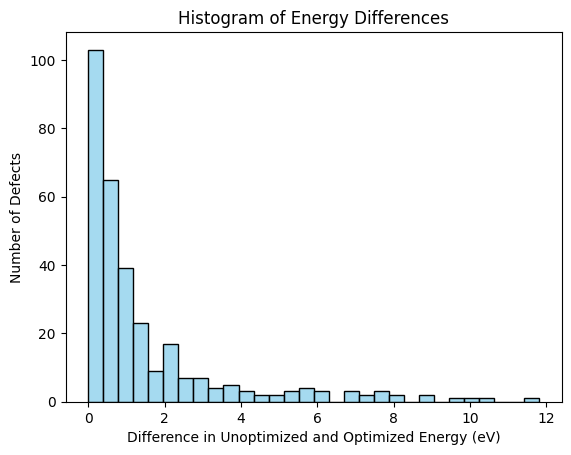

In [ ]:
#plt.figure(figsize=(6, 4))

sns.histplot(df_distribution['Difference'], color="skyblue", bins=30)

# Adding titles and labels
sns.set_style("whitegrid")
plt.title('Histogram of Energy Differences')
plt.xlabel('Difference in Unoptimized and Optimized Energy (eV)')
plt.ylabel('Number of Defects')

# Show the plot
plt.savefig('Histogram_A_rich.png', bbox_inches='tight')
plt.show()

In [ ]:
# Load the new CSV file into a pandas DataFrame
csv_path = '/content/drive/MyDrive/Defect_GNN/Error_B_rich_op_un.csv'
df_distribution = pd.read_csv(csv_path)

df_distribution.head()

,Sample,Difference
0,1,3.730648
1,2,3.021676
2,3,6.829235
3,4,2.637406
4,5,0.691042


In [ ]:
df_interstitial['deltaH_Arich'] = pd.to_numeric(df_interstitial['deltaH_Arich'], errors='coerce')
df_interstitial['deltaH_ArichUO'] = pd.to_numeric(df_interstitial['deltaH_ArichUO'], errors='coerce')


df_interstitial['deltaH_diff'] = (df_interstitial['deltaH_Arich'] - df_interstitial['deltaH_ArichUO']).abs()


top_interstitial_defects = df_interstitial.nlargest(10, 'deltaH_diff')


top_interstitial_defects.reset_index(drop=True, inplace=True)


top_interstitial_defects

<ipython-input-36-b4c7b9aee346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interstitial['deltaH_Arich'] = pd.to_numeric(df_interstitial['deltaH_Arich'], errors='coerce')
<ipython-input-36-b4c7b9aee346>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interstitial['deltaH_ArichUO'] = pd.to_numeric(df_interstitial['deltaH_ArichUO'], errors='coerce')
<ipython-input-36-b4c7b9aee346>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,AB,defect,deltaH_Arich,deltaH_ArichUO,Category,deltaH_diff
0,BN,N_i_neut,11.359644,23.169644,Interstitial,11.81000
1,SnC,Sn_i_neut,10.402151,20.854451,Interstitial,10.45230
2,BSb,Sb_i_neut,7.963989,18.006189,Interstitial,10.04220
3,AlN,Al_i_neut,8.298958,18.019788,Interstitial,9.72083
4,InN,In_i_neut,4.520876,13.411916,Interstitial,8.89104
5,SnC,Sn_i_A,10.590719,19.382029,Interstitial,8.79131
6,BSb,Sb_i_B,9.728841,17.836331,Interstitial,8.10749
7,GeC,Ge_i_neut,11.668141,19.325041,Interstitial,7.65690
8,AlN,Al_i_A,10.575133,18.099903,Interstitial,7.52477
9,SiC,Si_i_neut,10.410182,17.784912,Interstitial,7.37473


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/Dataset_1_without_metastable_structure/prediction_results_val_set.csv'
df_val = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

file_path = '/content/drive/MyDrive/Defect_GNN/Dataset_1_without_metastable_structure/prediction_results_train_set.csv'
df_train = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

file_path = '/content/drive/MyDrive/Defect_GNN/Dataset_1_without_metastable_structure/prediction_results_test_set.csv'
df_test = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

In [ ]:
import pandas as pd
# Combine the dataframes
combined_df = pd.concat([df_val, df_train, df_test], ignore_index=True)
combined_df

,id,target,prediction
0,292-GeSn-V_Sn-POSCAR0.cif,2.334152,1.259740
1,108-BAs-As_i_A-POSCAR0.cif,10.141950,10.243721
2,112-BSb-V_Sb-POSCAR0.cif,5.900286,2.882446
3,193-GaSb-Sb_Ga-POSCAR0.cif,1.978230,2.240432
4,40-ZnTe-Te_i_neut-POSCAR0.cif,5.204219,5.343413
...,...,...,...
297,84-BN-B_N-POSCAR0.cif,5.091782,14.530041
298,192-GaSb-V_Sb-POSCAR0.cif,2.546229,2.157531
299,87-BN-B_i_neut-POSCAR0.cif,13.767143,14.563943
300,215-InP-In_i_A-POSCAR0.cif,3.192308,2.881229


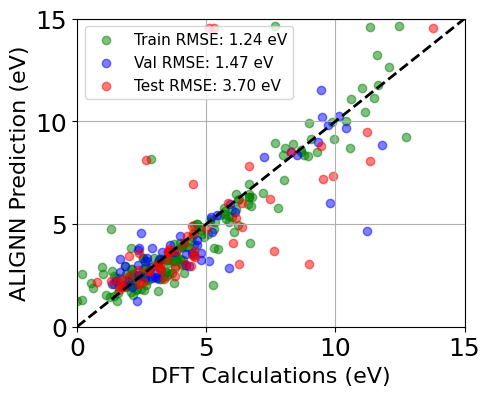

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


def calculate_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))


def clean_and_calc_rmse(df):
    df_cleaned = df.dropna(subset=['target', 'prediction'])
    df_cleaned['target'] = pd.to_numeric(df_cleaned['target'], errors='coerce')
    df_cleaned['prediction'] = pd.to_numeric(df_cleaned['prediction'], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['target', 'prediction'])
    rmse = calculate_rmse(df_cleaned['target'], df_cleaned['prediction'])
    return df_cleaned, rmse


df_val_cleaned, rmse_val = clean_and_calc_rmse(df_val)
df_train_cleaned, rmse_train = clean_and_calc_rmse(df_train)
df_test_cleaned, rmse_test = clean_and_calc_rmse(df_test)

plt.figure(figsize=(5, 4))
plt.scatter(df_train_cleaned['target'], df_train_cleaned['prediction'], alpha=0.5, color='green', label=f'Train RMSE: {rmse_train:.2f} eV')
plt.scatter(df_val_cleaned['target'], df_val_cleaned['prediction'], alpha=0.5, color='blue', label=f'Val RMSE: {rmse_val:.2f} eV')
plt.scatter(df_test_cleaned['target'], df_test_cleaned['prediction'], alpha=0.5, color='red', label=f'Test RMSE: {rmse_test:.2f} eV')

# Diagonal line
plt.plot([0, 15], [0, 15], 'k--', lw=2)

plt.xlim(0, 15)
plt.ylim(0, 15)

plt.xticks([ 0, 5, 10, 15])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yticks([ 0, 5, 10, 15])

plt.xlabel('DFT Calculations (eV)', size=16)
plt.ylabel('ALIGNN Prediction (eV)', size=16)
#plt.title('Parity Plot with RMSE', size=18)

plt.grid(True)
plt.legend(prop={'size':11})
plt.savefig('1.png', bbox_inches='tight')
plt.show()


In [ ]:
new_file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_optimization_Re_Zn.csv'
new_data = pd.read_csv(new_file_path)

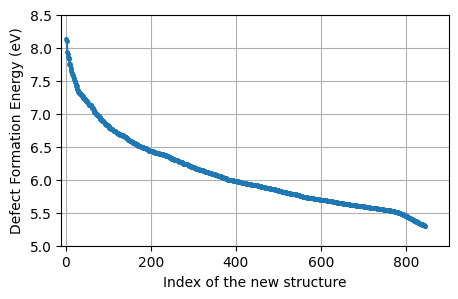

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5, 3))
plt.plot(new_data.iloc[:, 0], new_data.iloc[:, 1], marker='o', markeredgewidth=0.5, markersize=3)
plt.xlim(-10, 900)
plt.ylim(5.0, 8.5)
plt.title('')
plt.xlabel('Index of the new structure')
plt.ylabel('Defect Formation Energy (eV)')
plt.grid(True)
plt.savefig('1.png', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/id_prop_A_rich.csv'
df = pd.read_csv(file_path, names=['Defect', 'Formation_energy'])



#df.columns = ['defect', 'deltaH_Arich']

def refine_categorize_defect(defect_name):
    if "_i_" in defect_name:
        return "Interstitial"
    elif "V_" in defect_name:
        return "Vacancy"
    elif "_" in defect_name:
        return "Antisite"
    else:
        return "Other"

# Apply the categorization function to the 'Defect' column
df['Category'] = df['Defect'].apply(refine_categorize_defect)

# Creating separate DataFrames based on the defect category
df_vacancy = df[df['Category'] == 'Vacancy']
df_interstitial = df[df['Category'] == 'Interstitial']
df_antisite = df[df['Category'] == 'Antisite']

# Display the first few entries from each DataFrame (you can print or save these as needed)
print(df_vacancy.head())
print(df_interstitial.head())
print(df_antisite.head())

                                Defect  Formation_energy Category
0  CdTe-V_Cd+As_Cd-Neutral-POSCAR0.cif          0.860612  Vacancy
1  CdTe-V_Cd+As_Cd-Neutral-POSCAR1.cif          0.787232  Vacancy
2  CdTe-V_Cd+As_Cd-Neutral-POSCAR2.cif          0.683027  Vacancy
3  CdTe-V_Cd+As_Cd-Neutral-POSCAR3.cif          0.665283  Vacancy
4  CdTe-V_Cd+As_Cd-Neutral-POSCAR4.cif          0.582405  Vacancy
                                 Defect  Formation_energy      Category
46    3-CdTe-Cd_i_1-POSCAR0-Neutral.cif              1.68  Interstitial
47    4-CdTe-Te_i_1-POSCAR0-Neutral.cif              4.15  Interstitial
758  79-CdSe-Cd_i_1-POSCAR0-Neutral.cif              1.97  Interstitial
759  79-CdSe-Cd_i_1-POSCAR1-Neutral.cif              1.93  Interstitial
760  79-CdSe-Cd_i_1-POSCAR2-Neutral.cif              1.90  Interstitial
                              Defect  Formation_energy  Category
48  5-CdTe-Cd_Te-POSCAR0-Neutral.cif              2.17  Antisite
49  6-CdTe-Te_Cd-POSCAR0-Neutral.cif      

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/combined_neutral_A_rich_ALIGNN.csv'
df = pd.read_csv(file_path, names=['id', 'target', 'prediction'])

# Convert 'target' to numeric (float), handling non-numeric values gracefully
df['target'] = pd.to_numeric(df['target'], errors='coerce')

# Filter out rows where 'target' is NaN (due to conversion errors) or >= 15
df = df[df['target'] < 15]

def refine_categorize_defect(defect_name):
    if "_i_" in defect_name:
        return "Interstitial"
    elif "V_" in defect_name:
        return "Vacancy"
    elif "_" in defect_name:
        return "Antisite"
    else:
        return "Other"

# Apply the categorization function to the 'Defect' column
df['Category'] = df['id'].apply(refine_categorize_defect)

# Creating separate DataFrames based on the defect category
df_vacancy = df[df['Category'] == 'Vacancy']
df_interstitial = df[df['Category'] == 'Interstitial']
df_antisite = df[df['Category'] == 'Antisite']

# Combine the three DataFrames into one
combined_df = pd.concat([df_vacancy, df_interstitial, df_antisite])

# Function to calculate RMSE
def calculate_rmse(dataframe):
    mse = mean_squared_error(dataframe['target'], dataframe['prediction'])
    rmse = sqrt(mse)
    return rmse

# Calculate and print RMSE for each individual DataFrame
rmse_vacancy = calculate_rmse(df_vacancy)
rmse_interstitial = calculate_rmse(df_interstitial)
rmse_antisite = calculate_rmse(df_antisite)

print("RMSE for Vacancy:", rmse_vacancy)
print("RMSE for Interstitial:", rmse_interstitial)
print("RMSE for Antisite:", rmse_antisite)

# Calculate and print RMSE for the combined DataFrame
rmse_combined = calculate_rmse(combined_df)
print("RMSE for Combined DataFrame:", rmse_combined)



RMSE for Vacancy: 0.7591917754521362
RMSE for Interstitial: 0.30340740890126383
RMSE for Antisite: 0.693939495622311
RMSE for Combined DataFrame: 0.46112598343122424


In [ ]:
# Save df_vacancy to a CSV file
df_vacancy.to_csv('df_vacancy.csv', index=False)

# Save df_interstitial to a CSV file
df_interstitial.to_csv('df_interstitial.csv', index=False)

# Save df_antisite to a CSV file
df_antisite.to_csv('df_antisite.csv', index=False)


In [ ]:
# Load the new CSV file into a pandas DataFrame
csv_path = '/content/drive/MyDrive/Defect_GNN/DFT_unop_ALIGNN_unop.csv'
df = pd.read_csv(csv_path)
df.head()

,Defects,DFT_un,ALIGNN_un,Unnamed: 3
0,281-SiSn-V_Si-POSCAR0.vasp,3.352558,1.742828,1.609730
1,43-CdO-O_Cd-POSCAR0.vasp,9.090653,8.051958,1.038695
2,206-InN-In_i_B-POSCAR0.vasp,8.002790,7.052520,0.950270
3,79-CdTe-Te_i_B-POSCAR0.vasp,6.015202,5.097546,0.917656
4,39-ZnTe-Te_i_B-POSCAR0.vasp,8.960621,8.051423,0.909198


RMSE: 0.29638166841971947
R^2: 0.9908356532332389


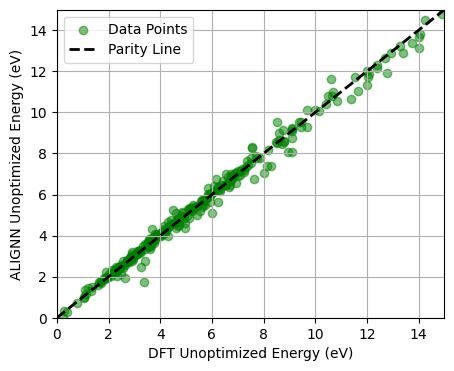

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Replace with your DataFrame loading method

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['DFT_un'], df['ALIGNN_un']))
print(f'RMSE: {rmse}')

# Calculate R^2 Score
r2 = r2_score(df['DFT_un'], df['ALIGNN_un'])
print(f'R^2: {r2}')

# Plotting
plt.figure(figsize=(5, 4))
plt.scatter(df['DFT_un'], df['ALIGNN_un'], alpha=0.5, color='green', label='Data Points')

# Diagonal line
plt.plot([0, 15], [0, 15], 'k--', lw=2, label='Parity Line')

plt.xlim(0, 15)
plt.ylim(0, 15)

plt.xlabel('DFT Unoptimized Energy (eV)')
plt.ylabel('ALIGNN Unoptimized Energy (eV)')

#plt.title(f'RMSE: {rmse:.3f}, R^2: {r2:.3f}')  # Displaying RMSE and R^2 in the title

plt.grid(True)
plt.legend()
plt.savefig('1.png', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Vacancy/prediction_results_test_set.csv'
df_vac = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Substitution/prediction_results_test_set.csv'
df_sub = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Interstitial/prediction_results_test_set.csv'
df_int = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

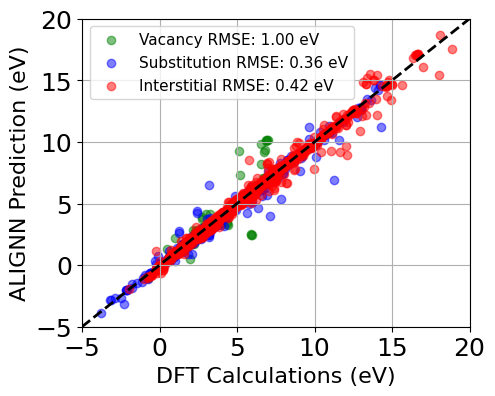

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def clean_and_calc_rmse(df):
    df_cleaned = df.dropna(subset=['target', 'prediction'])
    df_cleaned['target'] = pd.to_numeric(df_cleaned['target'], errors='coerce')
    df_cleaned['prediction'] = pd.to_numeric(df_cleaned['prediction'], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['target', 'prediction'])
    rmse = calculate_rmse(df_cleaned['target'], df_cleaned['prediction'])
    return df_cleaned, rmse



df_vac_cleaned, rmse_vac = clean_and_calc_rmse(df_vac)
df_sub_cleaned, rmse_sub = clean_and_calc_rmse(df_sub)
df_int_cleaned, rmse_int = clean_and_calc_rmse(df_int)

plt.figure(figsize=(5, 4))
plt.scatter(df_vac_cleaned['target'], df_vac_cleaned['prediction'], alpha=0.5, color='green', label=f'Vacancy RMSE: {rmse_vac:.2f} eV')
plt.scatter(df_sub_cleaned['target'], df_sub_cleaned['prediction'], alpha=0.5, color='blue', label=f'Substitution RMSE: {rmse_sub:.2f} eV')
plt.scatter(df_int_cleaned['target'], df_int_cleaned['prediction'], alpha=0.5, color='red', label=f'Interstitial RMSE: {rmse_int:.2f} eV')

# Diagonal line
plt.plot([-5, 20], [-5, 20], 'k--', lw=2)

plt.xlim(-5, 20)
plt.ylim(-5, 20)

plt.xticks([-5, 0, 5, 10, 15, 20])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yticks([-5, 0, 5, 10, 15, 20])

plt.xlabel('DFT Calculations (eV)', size=16)
plt.ylabel('ALIGNN Prediction (eV)', size=16)
#plt.title('Parity Plot with RMSE', size=18)

plt.grid(True)
plt.legend(prop={'size':11})
plt.savefig('1.png', bbox_inches='tight')
plt.show()


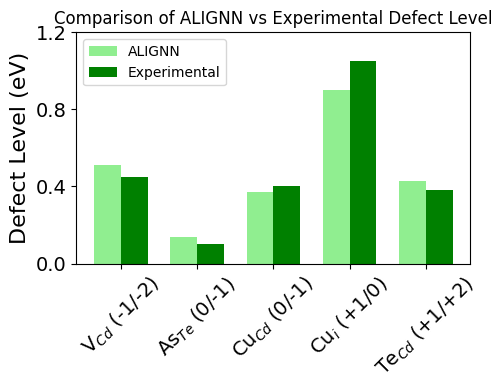

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_DFT_Defect_Level.csv'
df_dl = pd.read_csv(file_path, usecols=['Defects', 'ALIGNN', 'Experimental'])


defects = df_dl['Defects']
alignn = df_dl['ALIGNN']
experimental = df_dl['Experimental']
x = np.arange(len(defects))  # the label locations


plt.figure(figsize=(5, 4))
bar_width = 0.35  # width of the bars
plt.bar(x - bar_width/2, alignn, bar_width, label='ALIGNN', color='lightgreen')
plt.bar(x + bar_width/2, experimental, bar_width, label='Experimental', color='green')


plt.ylabel('Defect Level (eV)', size=16)
plt.title('Comparison of ALIGNN vs Experimental Defect Level')
plt.xticks(ticks=x, labels=defects, rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks([0, 0.4, 0.8, 1.2])
plt.legend()
plt.tight_layout()
plt.savefig('1.png', bbox_inches='tight')
plt.show()


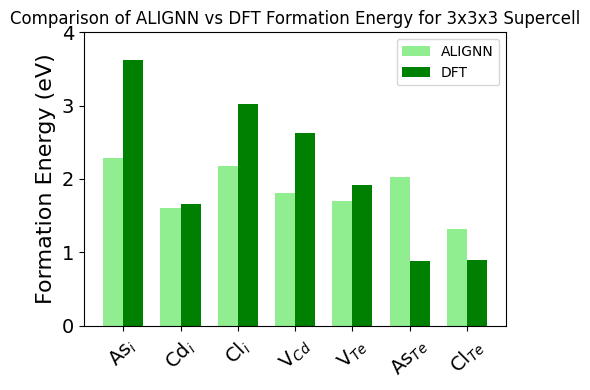

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Defect_GNN/3x3x3_supercell_prediction_CdTe_ALIGNN.csv'
df_dl = pd.read_csv(file_path, usecols=['Defects', 'DFT', 'ALIGNN'])


defects = df_dl['Defects']
alignn = df_dl['ALIGNN']
DFT = df_dl['DFT']
x = np.arange(len(defects))  # the label locations


plt.figure(figsize=(5, 4))
bar_width = 0.35  # width of the bars
plt.bar(x - bar_width/2, alignn, bar_width, label='ALIGNN', color='lightgreen')
plt.bar(x + bar_width/2, DFT, bar_width, label='DFT', color='green')


plt.ylabel('Formation Energy (eV)', size=16)
plt.title('Comparison of ALIGNN vs DFT Formation Energy for 3x3x3 Supercell')
plt.xticks(ticks=x, labels=defects, rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks([0, 1,2,3,4])
plt.legend()
plt.tight_layout()
plt.savefig('1.png', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
#file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Vacancy/prediction_results_test_set.csv'
#df_1 = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Dataset_1_2/prediction_results_test_set.csv'
df_1_2 = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Dataset_1_2_3/prediction_results_test_set.csv'
df_1_2_3 = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

#file_path = '/content/drive/MyDrive/Defect_GNN/ALIGNN_Model_Datatset_1_2_3_4/prediction_results_test_set.csv'
#df_1_2_3_4 = pd.read_csv(file_path, usecols=['id', 'target', 'prediction'])

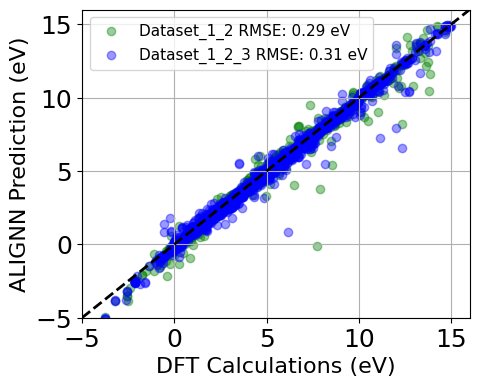

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def clean_and_calc_rmse(df):
    df_cleaned = df.dropna(subset=['target', 'prediction'])
    df_cleaned['target'] = pd.to_numeric(df_cleaned['target'], errors='coerce')
    df_cleaned['prediction'] = pd.to_numeric(df_cleaned['prediction'], errors='coerce')
    df_cleaned = df_cleaned.dropna(subset=['target', 'prediction'])
    # Remove data greater than 15
    df_cleaned = df_cleaned[(df_cleaned['target'] <= 15) & (df_cleaned['prediction'] <= 15)]
    rmse = calculate_rmse(df_cleaned['target'], df_cleaned['prediction'])
    return df_cleaned, rmse

.

df_1_2_cleaned, rmse_df_1_2 = clean_and_calc_rmse(df_1_2)
df_1_2_3_cleaned, rmse_df_1_2_3 = clean_and_calc_rmse(df_1_2_3)

plt.figure(figsize=(5, 4))
plt.scatter(df_1_2_cleaned['target'], df_1_2_cleaned['prediction'], alpha=0.4, color='green', label=f'Dataset_1_2 RMSE: {rmse_df_1_2:.2f} eV')
plt.scatter(df_1_2_3_cleaned['target'], df_1_2_3_cleaned['prediction'], alpha=0.4, color='blue', label=f'Dataset_1_2_3 RMSE: {rmse_df_1_2_3:.2f} eV')

# Diagonal line
plt.plot([-5, 16], [-5, 16], 'k--', lw=2)

plt.xlim(-5, 16)
plt.ylim(-5, 16)

plt.xticks([-5, 0, 5, 10, 15], fontsize=18)
plt.yticks([-5, 0, 5, 10, 15], fontsize=18)

plt.xlabel('DFT Calculations (eV)', size=16)
plt.ylabel('ALIGNN Prediction (eV)', size=16)
plt.grid(True)
plt.legend(prop={'size': 11})
plt.savefig('1.png', bbox_inches='tight')
plt.show()

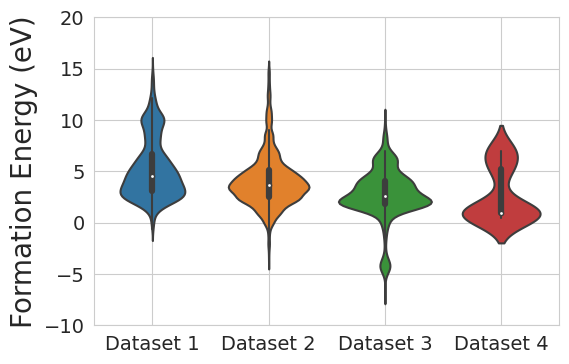

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/Defect_GNN/Dataset1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Defect_GNN/Dataset2.csv')
dataset3 = pd.read_csv('/content/drive/MyDrive/Defect_GNN/Dataset3.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/Defect_GNN/Dataset4.csv')


dataset1['Formation Energy'] = dataset1[dataset1.columns[1]]
dataset2['Formation Energy'] = dataset2[dataset2.columns[1]]
dataset3['Formation Energy'] = dataset3[dataset3.columns[1]]
dataset4['Formation Energy'] = dataset4[dataset4.columns[1]]


dataset1['Dataset'] = 'Dataset 1'
dataset2['Dataset'] = 'Dataset 2'
dataset3['Dataset'] = 'Dataset 3'
dataset4['Dataset'] = 'Dataset 4'


all_datasets = pd.concat([dataset1, dataset2, dataset3, dataset4])


plt.figure(figsize=(6, 4))
sns.violinplot(x="Dataset", y="Formation Energy", data=all_datasets, inner="box", linewidth=1.5)
sns.set_style("whitegrid")


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel('Formation Energy (eV)', fontsize=20)
plt.xlabel('', fontsize=16)
plt.ylim([-10, 20])
plt.grid(True)
#plt.savefig('1.png', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import linregress

# Load the Excel file and specify the sheet name
file_path = '/content/drive/MyDrive/Defect_GNN/Out_of_Sample_Test.xlsx'  # Replace with your file path
sheet_name = '3_2'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming the first two columns are the ones we are interested in
x = data.iloc[:, 0]  # First column
y = data.iloc[:, 1]  # Second column

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# The square of r_value is the R² value
r_squared = r_value ** 2

print("R-squared:", r_squared)


R-squared: 0.999691674858165


In [ ]:
import pandas as pd
from scipy.stats import linregress

# Load the Excel file and specify the sheet name
file_path = '/content/drive/MyDrive/Defect_GNN/GNN_Geometry_Optimization.xlsx'  # Replace with your file path
sheet_name = 'Re_Zn_ZnO'
data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

data.head()

,0,1
0,1,5.92000
1,2,8.44067
2,3,8.13957
3,4,8.10038
4,5,7.93615


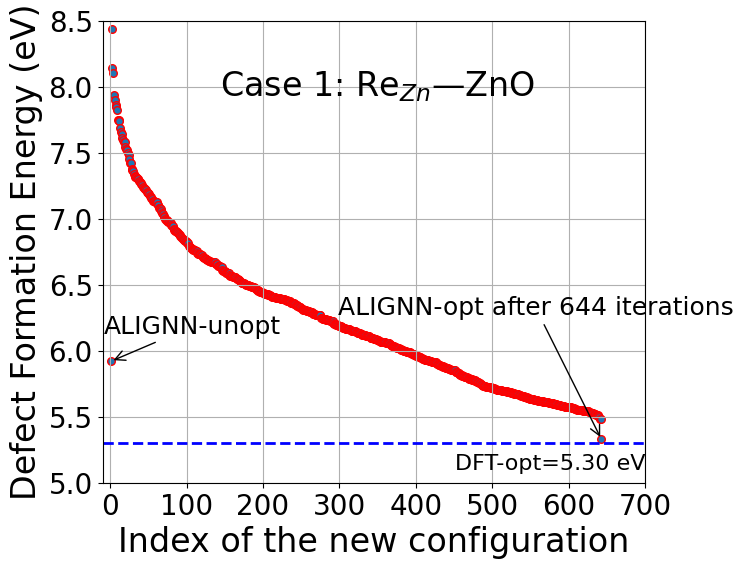

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(7, 6))

# Create a gradient background
x = np.linspace(-20, 700, 500)
y = np.linspace(5.0, 8.5, 400)
X, Y = np.meshgrid(x, y)
Z = (Y - np.min(y)) / (np.max(y) - np.min(y))  # Normalize Y to create a vertical gradient
plt.imshow(Z, extent=[-50, 2500, 3.0, 8.5], aspect='auto', origin='lower', cmap='YlOrBr', alpha=0.0)

# Scatter plot
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='o', edgecolors='r', s=30)  # s is the size of the markers
plt.xlim(-10, 700)
plt.ylim(5.0, 8.5)
plt.xlabel('Index of the new configuration', size=24, fontname='Arial narrow')
plt.ylabel('Defect Formation Energy (eV)', size=24, fontname='Arial narrow')
plt.grid(True)

plt.xticks(fontsize=20, fontname='Arial narrow')
plt.yticks(fontsize=20, fontname='Arial narrow')

# Draw a horizontal dashed line at Y=2.20 and label it
plt.axhline(y=5.30, color='blue', linestyle='--', linewidth=2)
plt.text(700, 5.10, 'DFT-opt=5.30 eV', horizontalalignment='right', fontsize=16, fontname='Arial narrow')

# Annotate the first and last points
first_point = (data.iloc[0, 0], data.iloc[0, 1])
last_point = (data.iloc[-1, 0], data.iloc[-1, 1])

plt.annotate('ALIGNN-unopt', xy=first_point, xytext=(-5, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=18, fontname='Arial narrow')
plt.annotate('ALIGNN-opt after 644 iterations', xy=last_point, xytext=(-190, 90), textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=18, fontname='Arial narrow')
plt.text(x=350, y=8.0, s='Case 1: Re$_{Zn}$—ZnO', fontsize=24,fontname='Arial narrow', ha='center', va='center')

# Save the figureCdSe$_{0.25}
plt.savefig('Re_Zn.png', bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import linregress

# Load the Excel file and specify the sheet name
file_path = '/content/drive/MyDrive/Defect_GNN/GNN_Geometry_Optimization.xlsx'  # Replace with your file path
sheet_name = 'La_Zn_ZnO'
data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)



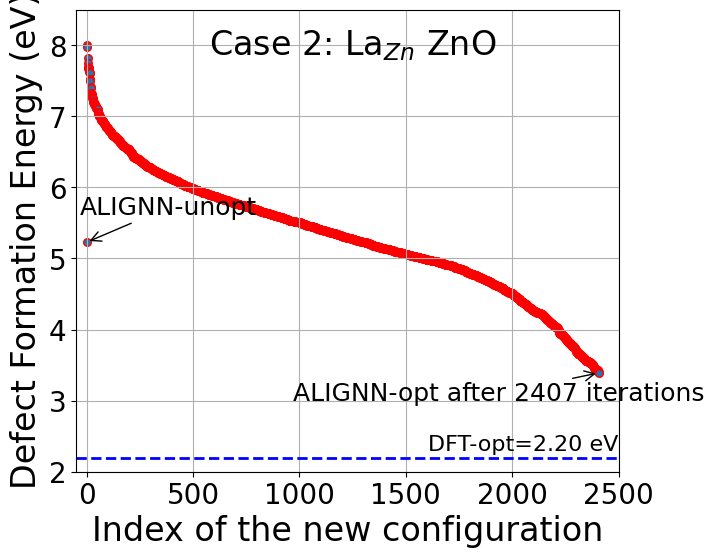

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(7, 6))

# Create a gradient background
x = np.linspace(-20, 700, 500)
y = np.linspace(5.0, 8.5, 400)
X, Y = np.meshgrid(x, y)
Z = (Y - np.min(y)) / (np.max(y) - np.min(y))  # Normalize Y to create a vertical gradient
plt.imshow(Z, extent=[-50, 2500, 3.0, 8.5], aspect='auto', origin='lower', cmap='YlOrBr', alpha=0.0)

# Scatter plot
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='o', edgecolors='r', s=30)  # s is the size of the markers
plt.xlim(-50, 2500)
plt.ylim(2.0, 8.5)
plt.xlabel('Index of the new configuration', size=24)
plt.ylabel('Defect Formation Energy (eV)', size=24)
plt.grid(True)

plt.xticks(fontsize=20, fontname='Arial narrow')
plt.yticks(fontsize=20, fontname='Arial narrow')


plt.axhline(y=2.20, color='blue', linestyle='--', linewidth=2)
plt.text(2500, 2.30, 'DFT-opt=2.20 eV', horizontalalignment='right', fontsize=16)


first_point = (data.iloc[0, 0], data.iloc[0, 1])
last_point = (data.iloc[-1, 0], data.iloc[-1, 1])

plt.annotate('ALIGNN-unopt', xy=first_point, xytext=(-5, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->"), fontsize=18)
plt.annotate('ALIGNN-opt after 2407 iterations', xy=last_point, xytext=(-220, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->"),fontsize=18)
plt.text(x=1250, y=8.0, s='Case 2: La$_{Zn}$ ZnO', fontsize=24,fontname='Arial narrow', ha='center', va='center')


plt.savefig('La_Zn.png', bbox_inches='tight')


plt.show()


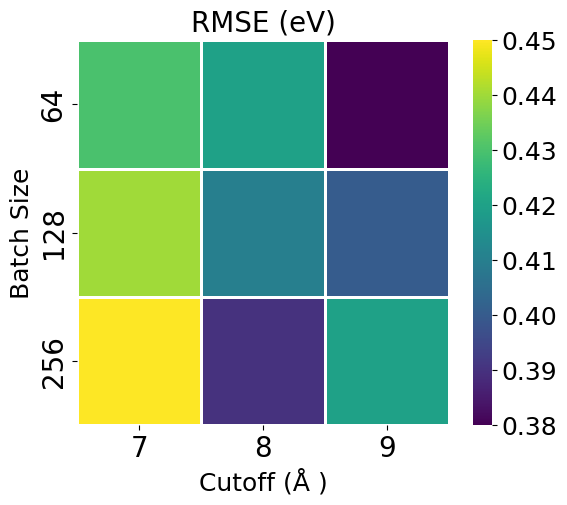

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path_updated = '/content/drive/MyDrive/Defect_GNN/hyperparameter.xlsx'
sheet_name = 'CGCNN'

data_updated = pd.read_excel(file_path_updated, sheet_name=sheet_name)


data_updated.set_index('Unnamed: 0', inplace=True)


plt.figure(figsize=(6, 5))
ax = sns.heatmap(data_updated, annot=False, cmap='viridis', linewidths=.9)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('RMSE (eV)', size=20)
plt.xlabel('Cutoff (Å )', size=18)
plt.ylabel('Batch Size', size=18)


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
plt.savefig('CGCNN.png', bbox_inches='tight')

plt.show()


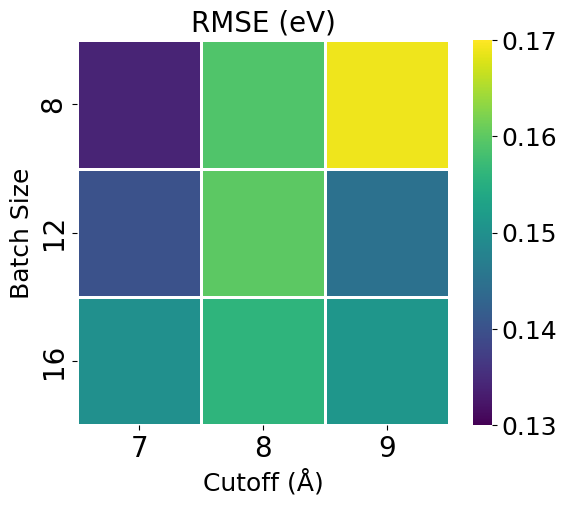

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path_updated = '/content/drive/MyDrive/Defect_GNN/hyperparameter.xlsx'
sheet_name = 'ALIGNN'

data_updated = pd.read_excel(file_path_updated, sheet_name=sheet_name)

# Set the index to the first column
data_updated.set_index('Unnamed: 0', inplace=True)

# Generating the heatmap with specified color range
plt.figure(figsize=(6, 5))
ax = sns.heatmap(data_updated, annot=False, cmap='viridis', linewidths=.9, vmin=0.13, vmax=0.17)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('RMSE (eV)', size=20)
plt.xlabel('Cutoff (Å)', size=18)
plt.ylabel('Batch Size', size=18)

# Adjust color bar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

# Save the figure
plt.savefig('ALIGNN.png', bbox_inches='tight')

# Show the plot
plt.show()
